In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [78]:
data=pd.read_csv("C:\\Users\\BEST BUY COMPUTERS\\Downloads\\RN.csv")

In [79]:
data.shape

(4117, 16)

In [80]:
data.columns

Index(['ID', 'AGE', 'INCOME', 'GENDER', 'MARITAL', 'NUMKIDS', 'NUMCARDS',
       'HOWPAID', 'EMPLOYED_DAYS', 'STORECAR', 'LOANS', 'LOAN_AMOUNT',
       'MORTGAGE', 'MORTGAGE_AMOUNT', 'CREDIT_SCORE', 'RISK,'],
      dtype='object')

In [81]:
data.info

<bound method DataFrame.info of           ID  AGE  INCOME GENDER    MARITAL  NUMKIDS  NUMCARDS  HOWPAID  \
0     100756   44   59944      m    married        1         2  monthly   
1     100668   35   59692      m    married        1         1  monthly   
2     100418   34   59508      m    married        1         1  monthly   
3     100416   34   59463      m    married        0         2  monthly   
4     100590   39   59393      f    married        0         2  monthly   
...      ...  ...     ...    ...        ...      ...       ...      ...   
4112  101121   20   15035      m    married        2         2   weekly   
4113  101602   23   15032      f    married        1         1  monthly   
4114  101983   25   15020      f    married        2         0   weekly   
4115  101819   24   15018      m    married        1         2  monthly   
4116  103676   50   15005      f  divsepwid        2         6   weekly   

      EMPLOYED_DAYS  STORECAR  LOANS  LOAN_AMOUNT MORTGAGE  MORTGAG

In [82]:
data.describe

<bound method NDFrame.describe of           ID  AGE  INCOME GENDER    MARITAL  NUMKIDS  NUMCARDS  HOWPAID  \
0     100756   44   59944      m    married        1         2  monthly   
1     100668   35   59692      m    married        1         1  monthly   
2     100418   34   59508      m    married        1         1  monthly   
3     100416   34   59463      m    married        0         2  monthly   
4     100590   39   59393      f    married        0         2  monthly   
...      ...  ...     ...    ...        ...      ...       ...      ...   
4112  101121   20   15035      m    married        2         2   weekly   
4113  101602   23   15032      f    married        1         1  monthly   
4114  101983   25   15020      f    married        2         0   weekly   
4115  101819   24   15018      m    married        1         2  monthly   
4116  103676   50   15005      f  divsepwid        2         6   weekly   

      EMPLOYED_DAYS  STORECAR  LOANS  LOAN_AMOUNT MORTGAGE  MORTG

In [83]:
data.isnull().sum()

ID                 0
AGE                0
INCOME             0
GENDER             0
MARITAL            0
NUMKIDS            0
NUMCARDS           0
HOWPAID            0
EMPLOYED_DAYS      0
STORECAR           0
LOANS              0
LOAN_AMOUNT        0
MORTGAGE           0
MORTGAGE_AMOUNT    0
CREDIT_SCORE       0
RISK,              0
dtype: int64

In [84]:
data.duplicated().sum() 


np.int64(0)

In [85]:
#NO DUPLICATES VALUES

In [86]:
data.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,"RISK,"
0,100756,44,59944,m,married,1,2,monthly,6503,2,0,0,y,155000,"0,73",good risk
1,100668,35,59692,m,married,1,1,monthly,5842,1,0,0,y,144000,"0,46",bad loss
2,100418,34,59508,m,married,1,1,monthly,2649,2,1,25370,y,157000,"0,53",good risk
3,100416,34,59463,m,married,0,2,monthly,3423,1,1,28220,y,135000,"0,31",bad loss
4,100590,39,59393,f,married,0,2,monthly,4964,1,0,0,y,145000,"0,81",good risk


In [87]:
data.dtypes

ID                  int64
AGE                 int64
INCOME              int64
GENDER             object
MARITAL            object
NUMKIDS             int64
NUMCARDS            int64
HOWPAID            object
EMPLOYED_DAYS       int64
STORECAR            int64
LOANS               int64
LOAN_AMOUNT         int64
MORTGAGE           object
MORTGAGE_AMOUNT     int64
CREDIT_SCORE       object
RISK,              object
dtype: object

In [88]:
#CODE TO REPLACE , WITH . in CREDIT SCORE VALUE
data['CREDIT_SCORE'] = data['CREDIT_SCORE'].str.replace(',', '.') 

In [89]:
data.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,"RISK,"
0,100756,44,59944,m,married,1,2,monthly,6503,2,0,0,y,155000,0.73,good risk
1,100668,35,59692,m,married,1,1,monthly,5842,1,0,0,y,144000,0.46,bad loss
2,100418,34,59508,m,married,1,1,monthly,2649,2,1,25370,y,157000,0.53,good risk
3,100416,34,59463,m,married,0,2,monthly,3423,1,1,28220,y,135000,0.31,bad loss
4,100590,39,59393,f,married,0,2,monthly,4964,1,0,0,y,145000,0.81,good risk


In [90]:
data.dtypes

ID                  int64
AGE                 int64
INCOME              int64
GENDER             object
MARITAL            object
NUMKIDS             int64
NUMCARDS            int64
HOWPAID            object
EMPLOYED_DAYS       int64
STORECAR            int64
LOANS               int64
LOAN_AMOUNT         int64
MORTGAGE           object
MORTGAGE_AMOUNT     int64
CREDIT_SCORE       object
RISK,              object
dtype: object

In [91]:
#converting data type ofc credit score to float
data['CREDIT_SCORE'] = data['CREDIT_SCORE'].astype(float)

In [92]:
data.dtypes

ID                   int64
AGE                  int64
INCOME               int64
GENDER              object
MARITAL             object
NUMKIDS              int64
NUMCARDS             int64
HOWPAID             object
EMPLOYED_DAYS        int64
STORECAR             int64
LOANS                int64
LOAN_AMOUNT          int64
MORTGAGE            object
MORTGAGE_AMOUNT      int64
CREDIT_SCORE       float64
RISK,               object
dtype: object

In [93]:
data["RISK,"].unique()

array(['good risk', 'bad loss', 'bad profit'], dtype=object)

In [94]:
data["GENDER"].unique()

array(['m', 'f'], dtype=object)

In [95]:
data["HOWPAID"].unique()

array(['monthly', 'weekly'], dtype=object)

In [96]:
data["MORTGAGE"].unique()

array(['y', 'n'], dtype=object)

In [97]:
data["MARITAL"].unique()

array(['married', 'single', 'divsepwid'], dtype=object)

In [98]:
data.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,"RISK,"
0,100756,44,59944,m,married,1,2,monthly,6503,2,0,0,y,155000,0.73,good risk
1,100668,35,59692,m,married,1,1,monthly,5842,1,0,0,y,144000,0.46,bad loss
2,100418,34,59508,m,married,1,1,monthly,2649,2,1,25370,y,157000,0.53,good risk
3,100416,34,59463,m,married,0,2,monthly,3423,1,1,28220,y,135000,0.31,bad loss
4,100590,39,59393,f,married,0,2,monthly,4964,1,0,0,y,145000,0.81,good risk


In [99]:
#finding outliers
numeric_cols = data.select_dtypes(include=[np.number])
numeric_cols.dtypes

ID                   int64
AGE                  int64
INCOME               int64
NUMKIDS              int64
NUMCARDS             int64
EMPLOYED_DAYS        int64
STORECAR             int64
LOANS                int64
LOAN_AMOUNT          int64
MORTGAGE_AMOUNT      int64
CREDIT_SCORE       float64
dtype: object

Text(0.5, 1.0, 'Before Outlier Removal')

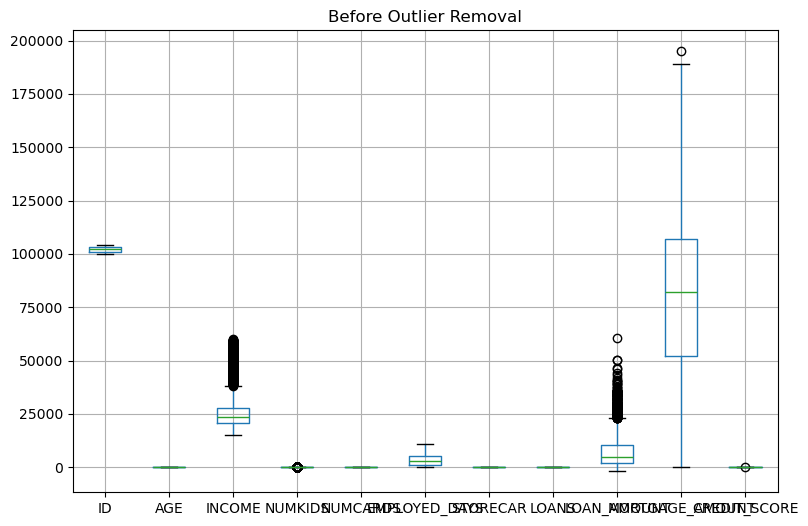

In [100]:
# Identify numeric columns


# Calculate IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers        # 0.25-1.5*0.5 = -0.5                      #  0.75 + 1.5 * 0.5 = 1.5

data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualizing the data before and after outlier removal
plt.figure(figsize=(20, 6))

# Box plot before removing outliers
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")



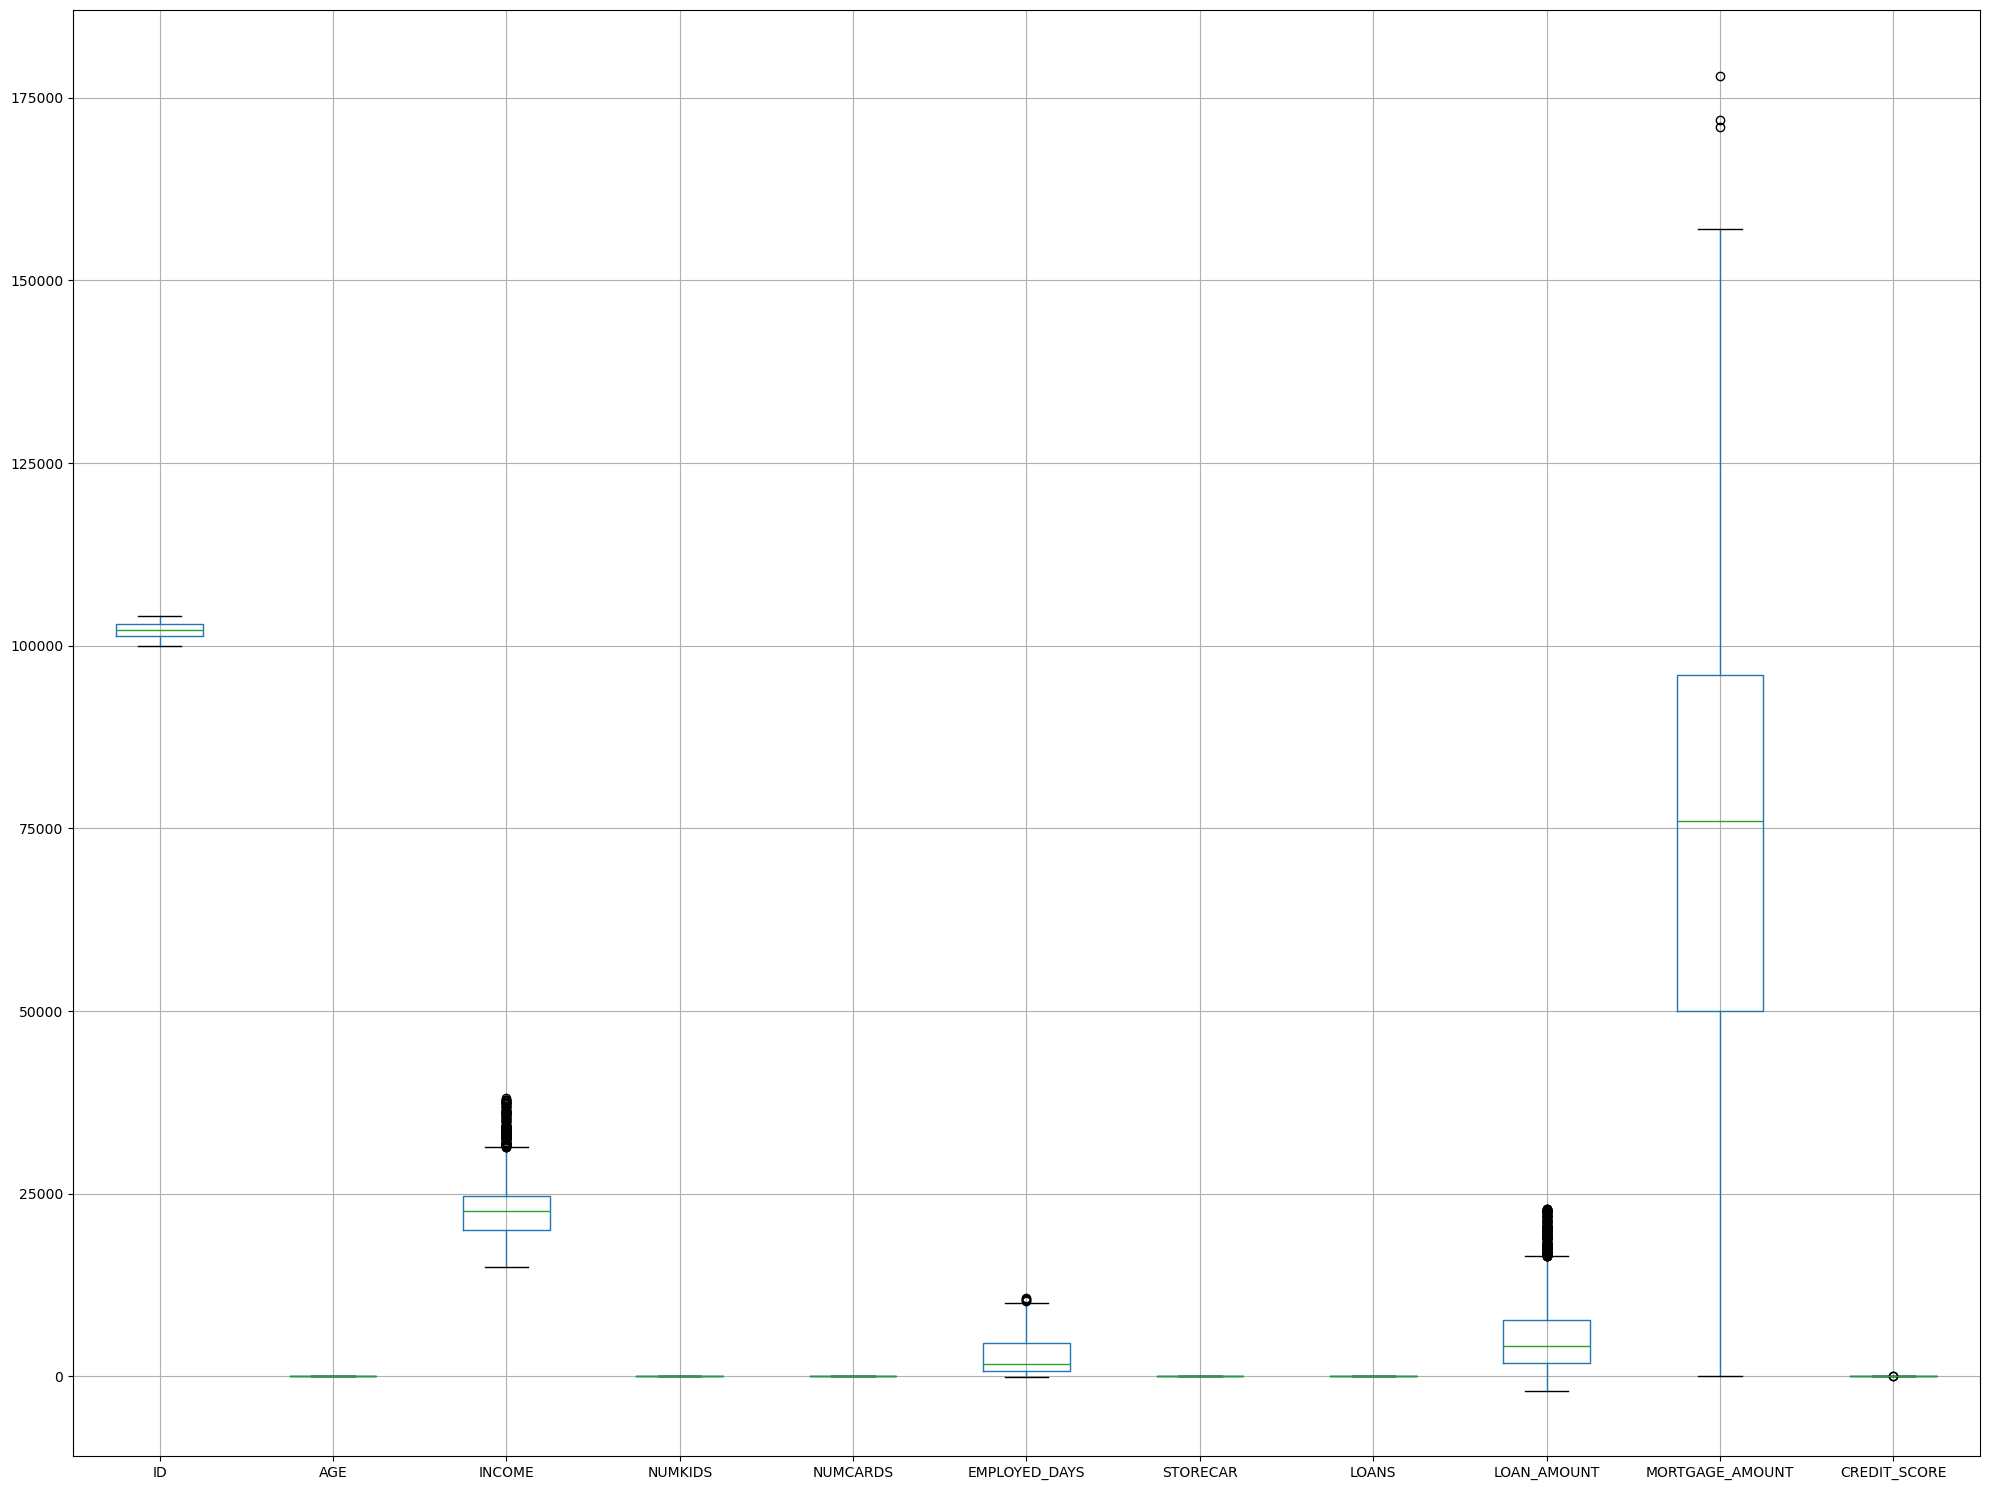

<Figure size 640x480 with 0 Axes>

In [101]:
 # Box plot after removing outliers
# plt.subplot(1, 2, 2)
# data_cleaned.select_dtypes(include=[np.number]).boxplot()
# plt.title("After Outlier Removal")
plt.figure(figsize=(20, 15))
data_cleaned.boxplot()
plt.tight_layout()
plt.show()
# # Box plot after removing outliers
# plt.subplot(1, 2, 2)
# data_cleaned.select_dtypes(include=[np.number]).boxplot()
# plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

In [102]:
data.shape

(4117, 16)

In [103]:
data_cleaned.shape

(3183, 16)

In [104]:
data.shape

(4117, 16)

In [105]:
data_cleaned.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,"RISK,"
505,100257,29,38097,m,single,0,1,monthly,3508,2,0,0,y,93000,0.54,good risk
506,100268,45,37895,f,single,0,1,monthly,6090,0,0,0,y,89000,0.88,good risk
507,100119,34,37885,m,single,0,1,monthly,2963,1,0,0,y,107000,0.48,bad loss
508,100675,42,37837,m,married,1,2,monthly,4460,2,1,10070,y,101000,0.79,good risk
509,100501,37,37810,f,married,1,2,monthly,2336,1,0,0,y,111000,0.44,bad loss


In [36]:
# Define the mapping dictionary
risk_mapping = {
    'good risk': 0,
    'bad loss': 1,
    'bad profit': 2
}

# Map the 'risk' column
data_cleaned['risk_mapped'] = data_cleaned['RISK,'].map(risk_mapping)
data_cleaned.head(5)

C:\Users\BEST BUY COMPUTERS\AppData\Local\Temp\ipykernel_7408\1356589814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['risk_mapped'] = data_cleaned['RISK,'].map(risk_mapping)


,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,"RISK,",risk_mapped
505,100257,29,38097,m,single,0,1,monthly,3508,2,0,0,y,93000,0.54,good risk,0
506,100268,45,37895,f,single,0,1,monthly,6090,0,0,0,y,89000,0.88,good risk,0
507,100119,34,37885,m,single,0,1,monthly,2963,1,0,0,y,107000,0.48,bad loss,1
508,100675,42,37837,m,married,1,2,monthly,4460,2,1,10070,y,101000,0.79,good risk,0
509,100501,37,37810,f,married,1,2,monthly,2336,1,0,0,y,111000,0.44,bad loss,1


In [58]:
data_cleaned.duplicated().sum()

np.int64(0)

In [66]:
data.dtypes

ID                   int64
AGE                  int64
INCOME               int64
GENDER              object
MARITAL             object
NUMKIDS              int64
NUMCARDS             int64
HOWPAID             object
EMPLOYED_DAYS        int64
STORECAR             int64
LOANS                int64
LOAN_AMOUNT          int64
MORTGAGE            object
MORTGAGE_AMOUNT      int64
CREDIT_SCORE       float64
RISK,               object
risk_mapped          int64
dtype: object

In [59]:
#sEPRATING nUMERICAL aND cAT DATA
data_num=data_cleaned.select_dtypes("number")
data_cat=data_cleaned.select_dtypes("object")

In [60]:
data_num.dtypes

ID                   int64
AGE                  int64
INCOME               int64
NUMKIDS              int64
NUMCARDS             int64
EMPLOYED_DAYS        int64
STORECAR             int64
LOANS                int64
LOAN_AMOUNT          int64
MORTGAGE_AMOUNT      int64
CREDIT_SCORE       float64
risk_mapped          int64
dtype: object

In [61]:
data_cat.dtypes

GENDER      object
MARITAL     object
HOWPAID     object
MORTGAGE    object
RISK,       object
dtype: object

In [62]:
#finding COrr of num values
corr=data_num.corr().round(2)
corr

,ID,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE,risk_mapped
ID,1.00,0.52,-0.18,0.52,0.74,0.49,0.69,0.46,0.51,-0.06,-0.22,0.01
AGE,0.52,1.00,0.30,0.43,0.60,0.95,0.53,0.23,0.48,0.16,-0.02,-0.43
INCOME,-0.18,0.30,1.00,-0.11,0.00,0.28,-0.05,-0.27,0.05,0.21,0.16,-0.41
NUMKIDS,0.52,0.43,-0.11,1.00,0.52,0.43,0.62,0.62,0.55,0.39,-0.18,-0.05
NUMCARDS,0.74,0.60,0.00,0.52,1.00,0.58,0.64,0.53,0.57,-0.11,-0.13,-0.16
EMPLOYED_DAYS,0.49,0.95,0.28,0.43,0.58,1.00,0.52,0.24,0.50,0.15,-0.03,-0.41
STORECAR,0.69,0.53,-0.05,0.62,0.64,0.52,1.00,0.48,0.51,0.14,-0.21,-0.12
LOANS,0.46,0.23,-0.27,0.62,0.53,0.24,0.48,1.00,0.68,0.02,-0.19,0.15
LOAN_AMOUNT,0.51,0.48,0.05,0.55,0.57,0.50,0.51,0.68,1.00,0.06,-0.14,-0.05
MORTGAGE_AMOUNT,-0.06,0.16,0.21,0.39,-0.11,0.15,0.14,0.02,0.06,1.00,0.00,-0.16


<Axes: >

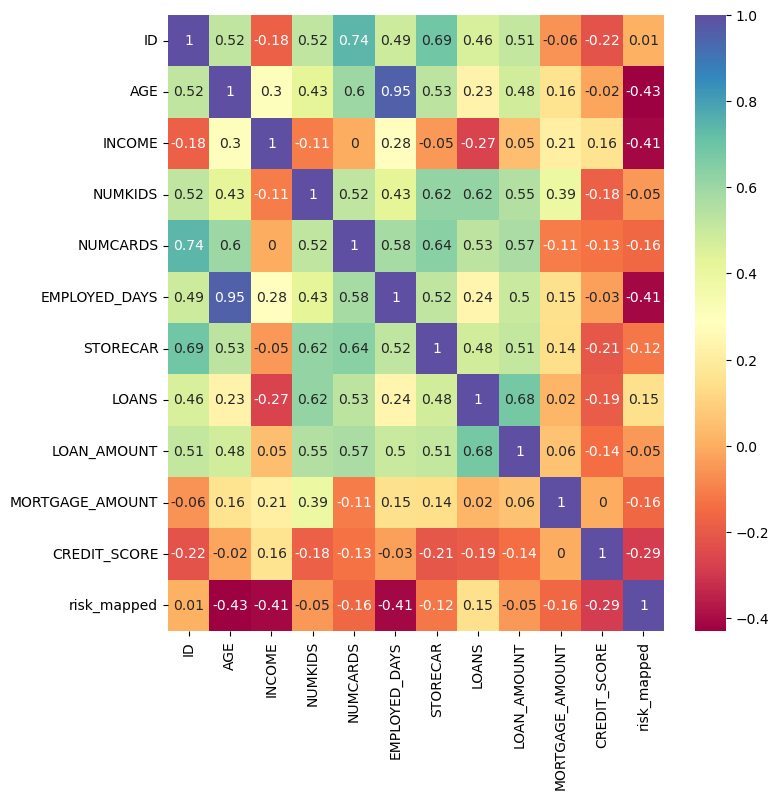

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(data=corr,annot=True,cmap='Spectral')

In [ ]:
#Risk have low correlaion with NUMKIDS , storecar , NUMCARDS , LOAN AMOUNT

In [64]:
data.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,"RISK,"
0,100756,44,59944,m,married,1,2,monthly,6503,2,0,0,y,155000,0.73,good risk
1,100668,35,59692,m,married,1,1,monthly,5842,1,0,0,y,144000,0.46,bad loss
2,100418,34,59508,m,married,1,1,monthly,2649,2,1,25370,y,157000,0.53,good risk
3,100416,34,59463,m,married,0,2,monthly,3423,1,1,28220,y,135000,0.31,bad loss
4,100590,39,59393,f,married,0,2,monthly,4964,1,0,0,y,145000,0.81,good risk


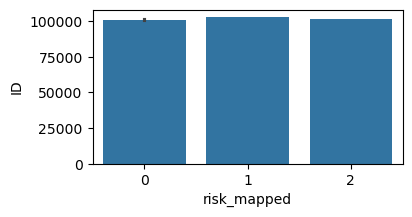

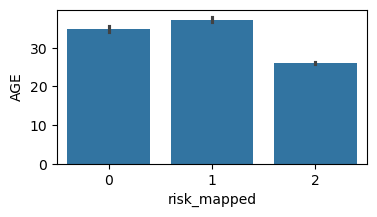

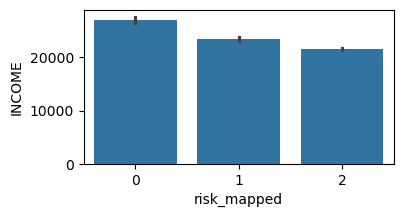

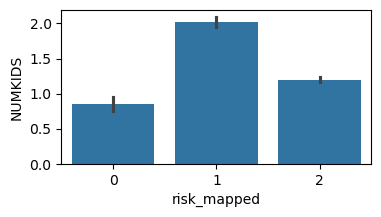

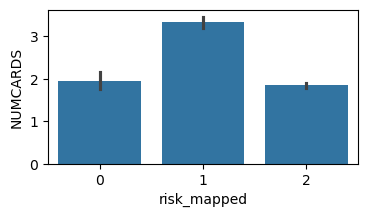

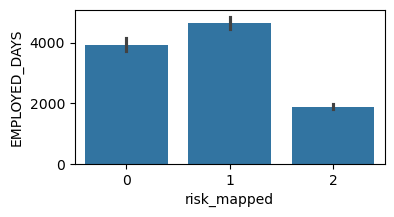

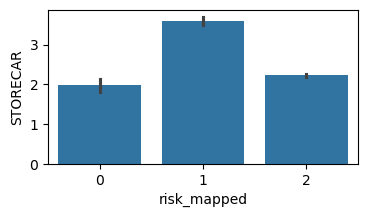

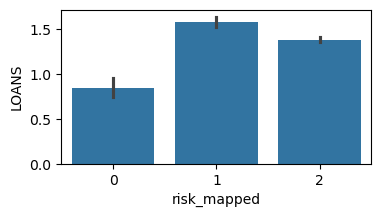

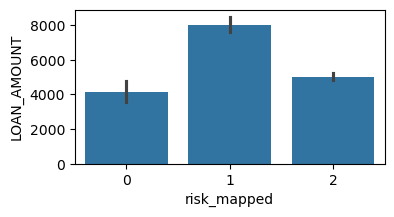

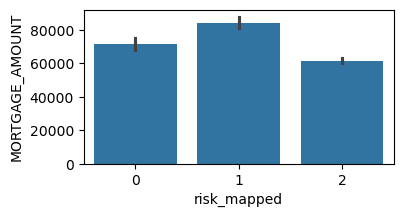

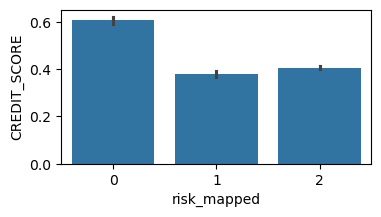

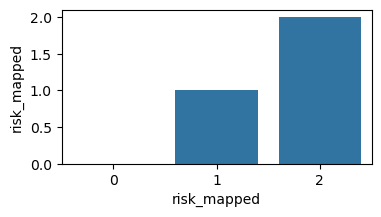

In [66]:
for col in data_num[:]:
    plt.figure(figsize=(4,2),)
    sns.barplot(data_cleaned,x='risk_mapped',y=col)

<Axes: xlabel='RISK,', ylabel='count'>

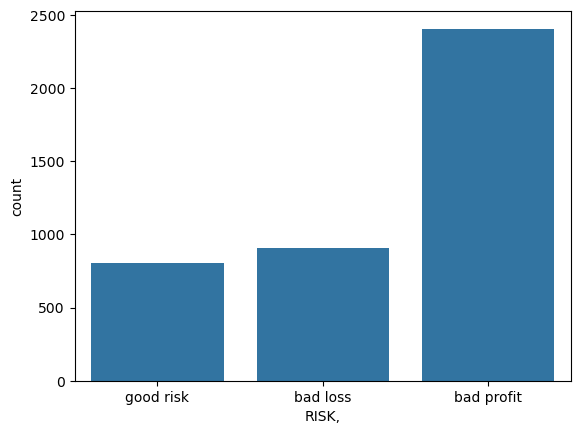

In [67]:
sns.countplot(data,x='RISK,')

C:\Users\BEST BUY COMPUTERS\AppData\Local\Temp\ipykernel_12744\1882851600.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=(1.05,0.5))


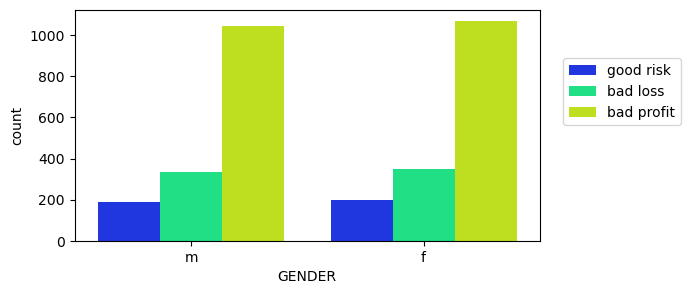

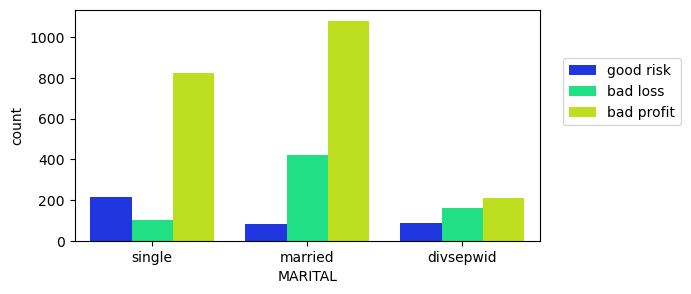

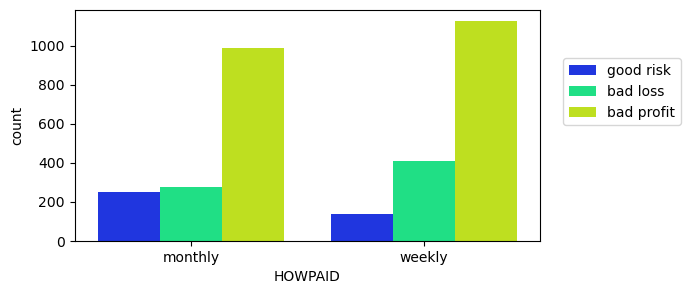

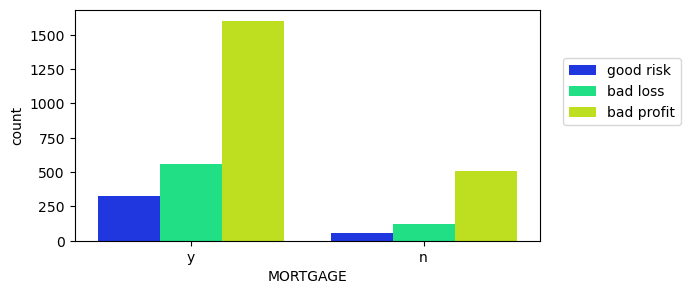

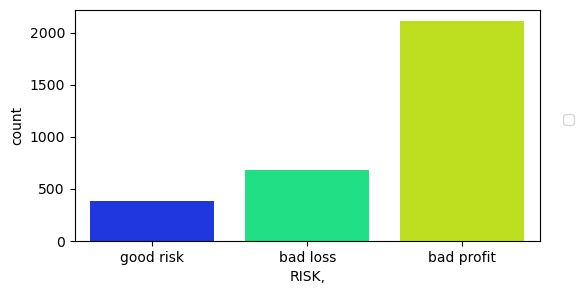

In [68]:
for col in data_cat[:]:
    plt.figure(figsize=(6,3),dpi=100)
    sns.countplot(data_cleaned,x=col,hue='RISK,',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

In [72]:
data_cleaned["RISK,"].unique()

array(['good risk', 'bad loss', 'bad profit'], dtype=object)

In [73]:
data_cleaned["RISK,"].value_counts()

RISK,
bad profit    2114
bad loss       683
good risk      386
Name: count, dtype: int64

In [74]:
data_cleaned["RISK,"].value_counts(True)*100

RISK,
bad profit    66.415331
bad loss      21.457744
good risk     12.126924
Name: proportion, dtype: float64

In [41]:
#BALACING DATA SET
from collections import Counter
# Separate features and target
X = data_cleaned.drop('RISK,', axis=1)
y = data_cleaned['RISK,']

# Before SMOTE
print("Original class distribution:", Counter(y))


Original class distribution: Counter({'bad profit': 2114, 'bad loss': 683, 'good risk': 386})


In [42]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# After SMOTE
print("Resampled class distribution:", Counter(y_resampled))

ValueError: could not convert string to float: 'm'

In [43]:
from collections import Counter

# Separate features and target
X = data.drop('RISK,', axis=1)
y = data['RISK,']

# Before SMOTEENN
print("Original class distribution:", Counter(y))



Original class distribution: Counter({'bad profit': 2407, 'bad loss': 906, 'good risk': 804})


In [44]:
#1st converting CAT VALUES TO NUMERICAL start with droping Risk 

data_cat_nr = data_cat.drop(['RISK,'],axis=1)
data_cat_nr.head()

NameError: name 'data_cat' is not defined

In [45]:
data_cat_encodd=pd.get_dummies(data_cat_nr,columns=data_cat_nr.columns.to_list())
data_cat_encodd

NameError: name 'data_cat_nr' is not defined

In [46]:
# Convert boolean DataFrame to integer DataFrame
data_cat_encodd =data_cat_encodd.astype(int)
# Convert boolean DataFrame to integer DataFrame
data_cat_encodd

NameError: name 'data_cat_encodd' is not defined

In [39]:
#comdining converted cat and num
data_finalEncoded=pd.concat([data_cat_encodd,data_num],axis=1,join="outer")


NameError: name 'data_cat_encodd' is not defined

In [83]:
data_finalEncoded.head()
data_finalEncoded=data_finalEncoded.drop(['ID'],axis=1)

In [84]:
data_finalEncoded.head()

,GENDER_f,GENDER_m,MARITAL_divsepwid,MARITAL_married,MARITAL_single,HOWPAID_monthly,HOWPAID_weekly,MORTGAGE_n,MORTGAGE_y,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE,risk_mapped
505,0,1,0,0,1,1,0,0,1,29,38097,0,1,3508,2,0,0,93000,0.54,0
506,1,0,0,0,1,1,0,0,1,45,37895,0,1,6090,0,0,0,89000,0.88,0
507,0,1,0,0,1,1,0,0,1,34,37885,0,1,2963,1,0,0,107000,0.48,1
508,0,1,0,1,0,1,0,0,1,42,37837,1,2,4460,2,1,10070,101000,0.79,0
509,1,0,0,1,0,1,0,0,1,37,37810,1,2,2336,1,0,0,111000,0.44,1


In [89]:
data_finalEncoded['risk_mapped'].value_counts()

risk_mapped
2    2114
1     683
0     386
Name: count, dtype: int64

In [91]:
# Separate features and target
from collections import Counter
X = data_finalEncoded.drop('risk_mapped', axis=1)
y = data_finalEncoded['risk_mapped']

# Before SMOTEENN
print("Original class distribution:", Counter(y))



Original class distribution: Counter({2: 2114, 1: 683, 0: 386})


In [93]:
from imblearn.combine import SMOTEENN
# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# After SMOTEENN
print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({0: 1587, 1: 1322, 2: 954})


In [94]:
X_resampled.head()

,GENDER_f,GENDER_m,MARITAL_divsepwid,MARITAL_married,MARITAL_single,HOWPAID_monthly,HOWPAID_weekly,MORTGAGE_n,MORTGAGE_y,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE
0,0,1,0,0,1,1,0,0,1,29,38097,0,1,3508,2,0,0,93000,0.54
1,1,0,0,0,1,1,0,0,1,45,37895,0,1,6090,0,0,0,89000,0.88
2,0,1,0,1,0,1,0,0,1,42,37837,1,2,4460,2,1,10070,101000,0.79
3,1,0,0,0,1,1,0,0,1,36,37613,0,0,3324,2,0,0,95000,0.53
4,1,0,0,0,1,1,0,0,1,25,37571,0,1,2308,0,0,0,99000,0.64


In [38]:
X_resampled.shape()

NameError: name 'X_resampled' is not defined

In [95]:
y_resampled.unique()

array([0, 1, 2])

In [96]:
resampled_data=pd.concat([X_resampled,y_resampled],axis=1,join="outer")

In [97]:
resampled_data.columns

Index(['GENDER_f', 'GENDER_m', 'MARITAL_divsepwid', 'MARITAL_married',
       'MARITAL_single', 'HOWPAID_monthly', 'HOWPAID_weekly', 'MORTGAGE_n',
       'MORTGAGE_y', 'AGE', 'INCOME', 'NUMKIDS', 'NUMCARDS', 'EMPLOYED_DAYS',
       'STORECAR', 'LOANS', 'LOAN_AMOUNT', 'MORTGAGE_AMOUNT', 'CREDIT_SCORE',
       'risk_mapped'],
      dtype='object')

In [98]:
corr1=resampled_data.corr().round(2)
corr1

,GENDER_f,GENDER_m,MARITAL_divsepwid,MARITAL_married,MARITAL_single,HOWPAID_monthly,HOWPAID_weekly,MORTGAGE_n,MORTGAGE_y,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE,risk_mapped
GENDER_f,1.00,-0.56,-0.06,0.03,0.04,0.05,0.03,-0.02,0.02,-0.10,-0.09,-0.04,-0.04,-0.16,-0.02,-0.01,-0.07,-0.03,-0.01,0.13
GENDER_m,-0.56,1.00,0.01,0.06,-0.00,-0.01,0.06,0.06,-0.06,-0.12,-0.06,0.02,0.00,-0.04,0.01,0.11,0.05,-0.06,-0.06,0.16
MARITAL_divsepwid,-0.06,0.01,1.00,-0.29,-0.28,-0.36,0.48,0.51,-0.51,0.34,-0.11,0.38,0.66,0.33,0.35,0.55,0.55,-0.35,-0.02,-0.16
MARITAL_married,0.03,0.06,-0.29,1.00,-0.61,-0.16,0.04,-0.34,0.34,-0.06,-0.29,0.47,0.01,-0.04,0.36,0.28,0.15,0.46,-0.31,0.40
MARITAL_single,0.04,-0.00,-0.28,-0.61,1.00,0.49,-0.32,0.08,-0.08,-0.25,0.33,-0.74,-0.50,-0.25,-0.60,-0.63,-0.57,-0.33,0.30,-0.17
HOWPAID_monthly,0.05,-0.01,-0.36,-0.16,0.49,1.00,-0.74,-0.22,0.22,-0.14,0.42,-0.55,-0.56,-0.14,-0.53,-0.58,-0.51,0.02,0.28,-0.21
HOWPAID_weekly,0.03,0.06,0.48,0.04,-0.32,-0.74,1.00,0.31,-0.31,0.06,-0.35,0.40,0.47,0.06,0.38,0.54,0.43,-0.19,-0.21,0.26
MORTGAGE_n,-0.02,0.06,0.51,-0.34,0.08,-0.22,0.31,1.00,-1.00,-0.01,-0.19,0.06,0.38,0.00,0.17,0.30,0.24,-0.84,-0.12,0.13
MORTGAGE_y,0.02,-0.06,-0.51,0.34,-0.08,0.22,-0.31,-1.00,1.00,0.01,0.19,-0.06,-0.38,-0.00,-0.17,-0.30,-0.24,0.84,0.12,-0.13
AGE,-0.10,-0.12,0.34,-0.06,-0.25,-0.14,0.06,-0.01,0.01,1.00,0.21,0.39,0.50,0.95,0.44,0.11,0.38,0.26,-0.02,-0.40


<Axes: >

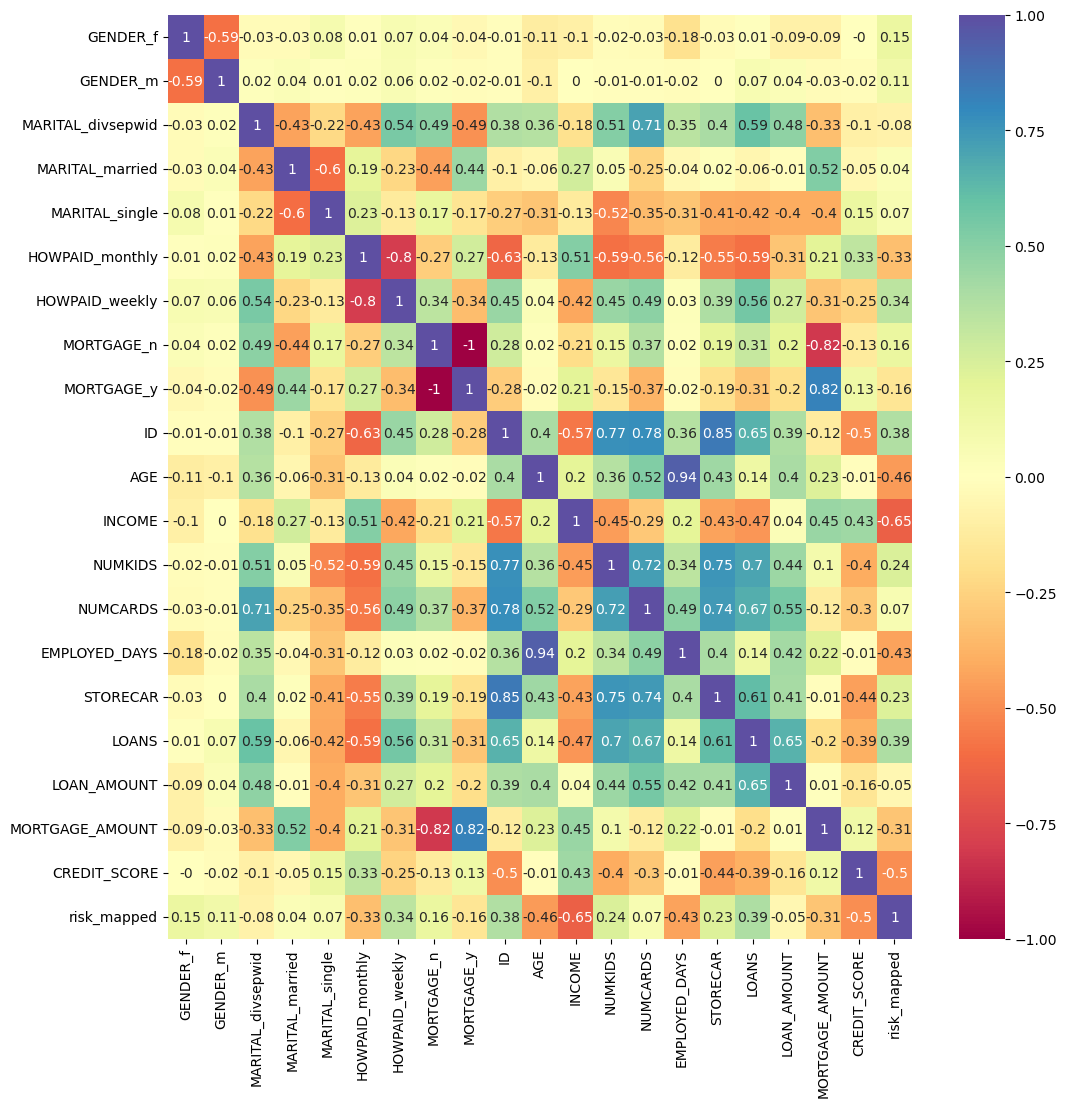

In [63]:
plt.figure(figsize=(12,12))
sns.heatmap(data=corr1,annot=True,cmap='Spectral')

In [100]:
X = resampled_data.drop('risk_mapped', axis=1)
y = resampled_data['risk_mapped']

In [102]:
X.head()

,GENDER_f,GENDER_m,MARITAL_divsepwid,MARITAL_married,MARITAL_single,HOWPAID_monthly,HOWPAID_weekly,MORTGAGE_n,MORTGAGE_y,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE
0,0,1,0,0,1,1,0,0,1,29,38097,0,1,3508,2,0,0,93000,0.54
1,1,0,0,0,1,1,0,0,1,45,37895,0,1,6090,0,0,0,89000,0.88
2,0,1,0,1,0,1,0,0,1,42,37837,1,2,4460,2,1,10070,101000,0.79
3,1,0,0,0,1,1,0,0,1,36,37613,0,0,3324,2,0,0,95000,0.53
4,1,0,0,0,1,1,0,0,1,25,37571,0,1,2308,0,0,0,99000,0.64


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
model = RandomForestClassifier()  
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [113]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9525452976704055
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       494
           1       0.98      0.91      0.94       388
           2       0.90      0.98      0.94       277

    accuracy                           0.95      1159
   macro avg       0.95      0.95      0.95      1159
weighted avg       0.95      0.95      0.95      1159



In [109]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[479   4  11]
 [ 17 353  18]
 [  0   5 272]]


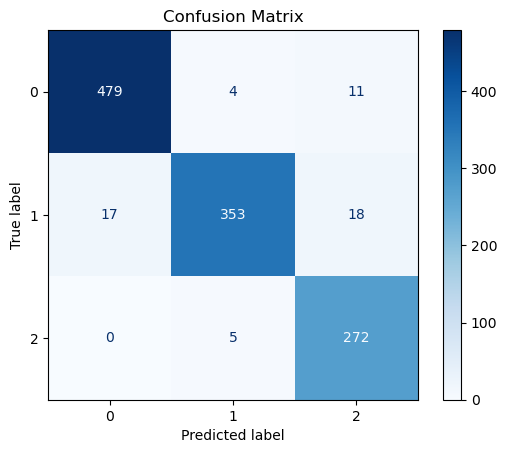

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' for integers
plt.title('Confusion Matrix')
plt.show()

In [116]:
y_pred_test=model.predict(X_test)
test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})
test

C:\anaconda\envs\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Actual,Predicted
1947,1,1
3087,2,1
1940,1,1
2603,1,1
3606,2,0
...,...,...
3404,2,1
1683,1,1
1326,0,0
2606,1,1


In [118]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.69598965 0.94307891 0.96377749 0.97150259 0.80958549]
Mean CV Score: 0.8767868274470638


In [119]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.5931952662721893
Test Accuracy: 0.9525452976704055


C:\anaconda\envs\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
